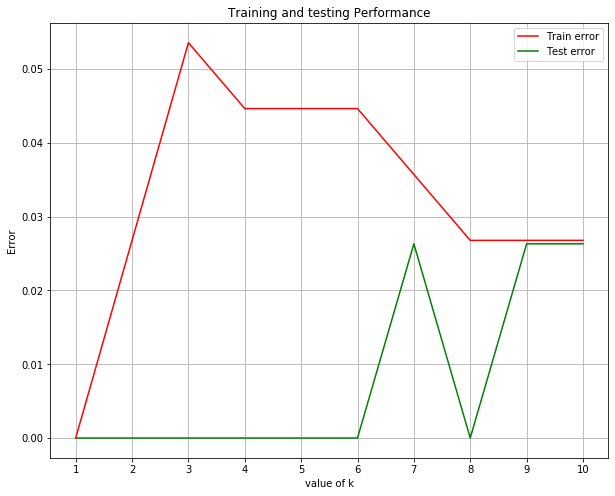

In [133]:
#import the data
from sklearn.datasets import load_iris
# import ffunction train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# use train/test split to split our data into two group
# our train size is 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,train_size=0.75)

# list containt differents value of k
k_range = list(range(1, 11))

#empty list to save train and test errors
k_scores1 = []
k_scores2 = []

# loop to take in account differents value of k
for k in k_range:
    # instantiate our model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit the model with data
    knn.fit(X_train, y_train)
    # predict the response for X_Train and X_test
    y_pred1 = knn.predict(X_train)
    y_pred2 = knn.predict(X_test)
    # compute the errors for train and test
    error1=1-metrics.accuracy_score(y_train, y_pred1)
    error2=1-metrics.accuracy_score(y_test, y_pred2)
    # saves these error into two list
    k_scores1.append(error1)
    k_scores2.append(error2)

# plot the graph of Training and testing Performance
# define the size of figure   
plt.figure(figsize=(10,8))

# define thicks of xlabels
plt.xticks(k_range)

# plot the first graph
p1=plt.plot(k_range,k_scores1,color='red')

# add the second graph
p1+=plt.plot(k_range,k_scores2,color='green')

# add the title
plt.title('Training and testing Performance')

# label the axes
plt.ylabel('Error')
plt.xlabel('value of k')

#insert the legend
plt.legend(['Train error', 'Test error'], loc='best')

#grid figure
plt.grid(axis="both")


here we try to find the optimal value of k using differents random_range


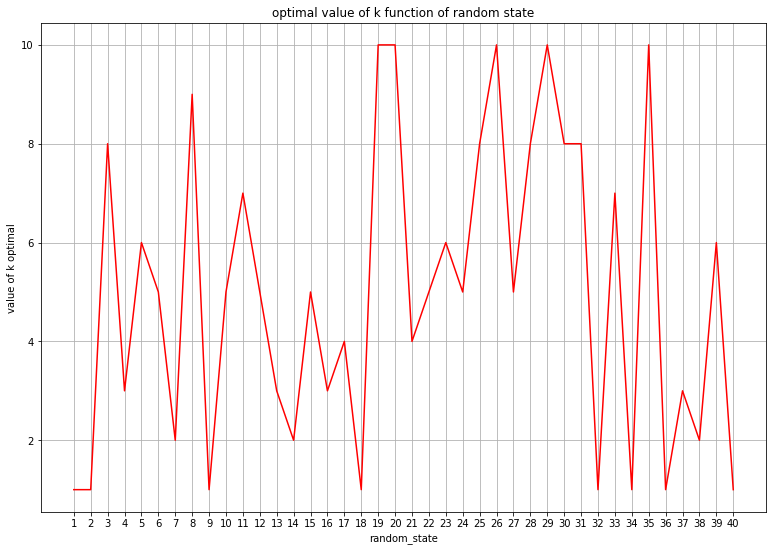

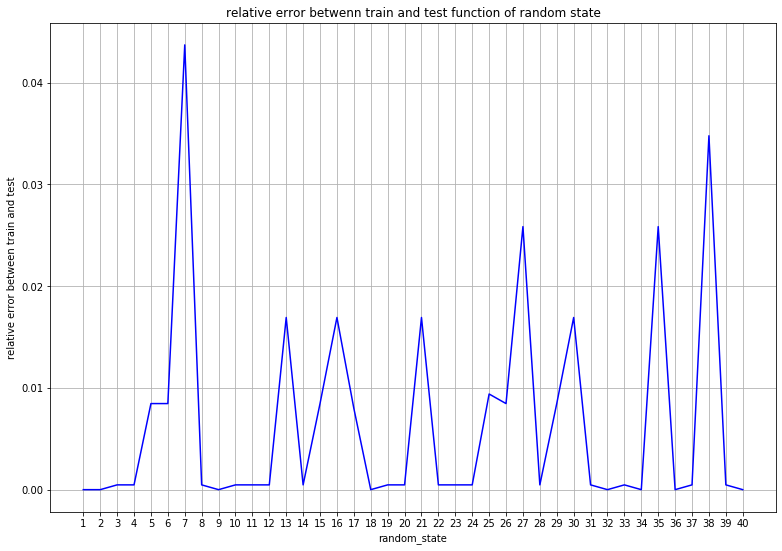

In [134]:

############################################################################################
################     function which take random_range as parameter       ###################
################     and return a list of relative error between test    ###################
################                  and train relative                     ###################
############################################################################################

def KNN_TT_diff(p):
  iris = load_iris()
  X = iris.data
  y = iris.target
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=p,train_size=0.75)
  k_range = list(range(1, 11))
  k_scores1 = []
  k_scores2 = []
  k_tol=[]
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred1 = knn.predict(X_train)
    y_pred2 = knn.predict(X_test)
    error1=1-metrics.accuracy_score(y_train, y_pred1)
    error2=1-metrics.accuracy_score(y_test, y_pred2)
    k_tol.append(abs(error1-error2))
    k_scores1.append(error1)
    k_scores2.append(error2)
  return  k_tol 

 #############################################################################################
 ########   using precedent function to find the optimal using the graph          ############
 ############################################################################################# 

# list containt different value of random state
i_range=list(range(1,41))
err_re=[]
k_opt=[]

for i in i_range:
  b=KNN_TT_diff(i)
  # take the minimum value of relative error
  err_re.append(min(b))
  # take index of this minimum
  c=b.index(min(b))
  # save index and minimum into two list
  k_opt.append(c+1)

#plot the graph of optimal value of k function of random state
plt.figure(figsize=(13,9))
plt.xticks(i_range)
plt.plot(i_range, k_opt,color='red')
plt.title('optimal value of k function of random state')
plt.ylabel('value of k optimal')
plt.xlabel('random_state')
plt.grid(axis="both")

#plot the graph of relative error betwenn train and test function of random state
plt.figure(figsize=(13,9))
plt.xticks(i_range)
plt.plot(i_range, err_re,color='blue')
plt.title('relative error betwenn train and test function of random state')
plt.ylabel('relative error between train and test')
plt.xlabel('random_state')
plt.grid(axis="both")